In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
nycd = pd.DataFrame.from_csv(open('Data/New_York_City_Leading_Causes_of_Death.csv', 'r'))

In [13]:
x = 'Ethnicity'
nycdap = nycd.groupby(x)
nycdap.apply(lambda s: len(s[x].unique()))

Ethnicity
ASIAN & PACIFIC ISLANDER    1
HISPANIC                    1
NON-HISPANIC BLACK          1
NON-HISPANIC WHITE          1
dtype: int64

In [18]:
year = '20070101'
sex = 'FEMALE'
ethnicity = 'NON-HISPANIC WHITE'

# Ethnicities: 'ASIAN & PACIFIC ISLANDER','HISPANIC','NON-HISPANIC BLACK','NON-HISPANIC WHITE'
# Sexes: 'FEMALE','MALE'


# This bit of program sorts, drops duplicates, isolates year, discards percent=0, 
# and isolates a gender and ethnicity declared above, rms death counts.

nycd.sort('Count', ascending = False, inplace = True)
nycd.drop_duplicates(inplace = True)

nycdyr = nycd.loc[year:year, ]
#Remember: Numbers placed in loc are treated as labels, not index. Use iloc for index.

nycdyr = nycdyr[nycdyr['Percent'] > 0]
nycdyr = nycdyr[nycdyr['Sex'].isin([sex])]
nycdyr = nycdyr[nycdyr['Ethnicity'].isin([ethnicity])]
nycdyr = nycdyr[['Cause of Death','Count','Percent']]
#Alternative sorting phrase (also works):
#nycdyr = nycdyr[nycdyr[''] == '']

In [17]:
print sum(nycdyr['Percent'])
print len(nycdyr.index)

93
17


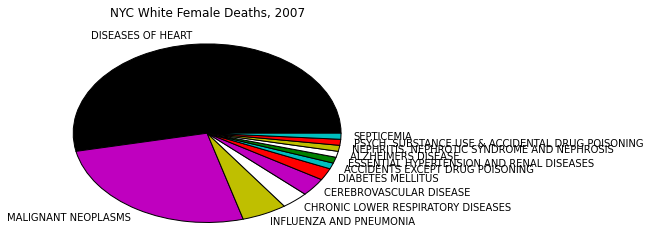

In [20]:
#Pie Chart for White Females
import random

labels = nycdyr['Cause of Death']
sizes = nycdyr['Percent']
colorset = 'rgbmcyw'
color = ['k']
explode = 0

#Ensures colors next to each other don't match
for x in xrange(len(nycdyr)):
    hold = random.choice(colorset)
    while color[x] == hold:
        hold = random.choice(colorset)
    color.append(hold)


plt.pie(sizes, labels = labels,
        colors = color)
title('NYC White Female Deaths, 2007')
plt.show()
#plt.axis('equal')
#autopct = '%1.1f%%', shadow = True, startangle = 0
#['red','yellow','green','blue','orange','purple']

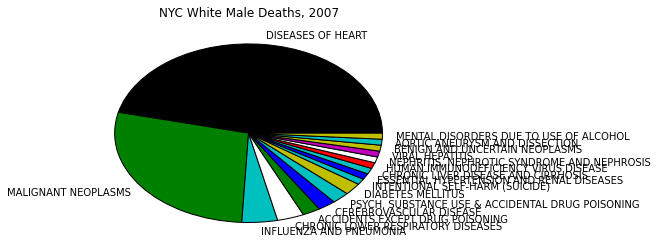

In [17]:
#Pie Chart for White Males
import random

labels = nycdyr['Cause of Death']
sizes = nycdyr['Percent']
colorset = 'rgbmcyw'
color = ['k']
explode = 0

#Ensures colors next to each other don't match
for x in xrange(len(nycdyr)):
    hold = random.choice(colorset)
    while color[x] == hold:
        hold = random.choice(colorset)
    color.append(hold)


plt.pie(sizes, labels = labels,
        colors = color)
title('NYC White Male Deaths, 2007')
plt.show()
#plt.axis('equal')
#autopct = '%1.1f%%', shadow = True, startangle = 0
#['red','yellow','green','blue','orange','purple']